# Programming for Data Analytics Project 2020
***



### Project brief

For this project you must create a data set by simulating a real-world phenomenon of your choosing.  You may pick any phenomenon you wish. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the `numpy.random` package for this purpose. Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate  the  types  of  variables  involved,  their  likely  distributions,  and  their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

<br>



## Introduction

I have divided this project into 4 sections, each one representing a bullet point listed in the brief above. 


<br>



## 1. Winning in football
***

For this project, I synthesise a data set containing 4 variables related to team performance in football. It contains 200 observations, with each representing an individual football match. For the most part, my simualated data is based on a dataset from the English Premier League 2018/2019 season [1]. Each observation is from the home team's perspective.

3 of the variables are taken directly from the this real world data set - *shots, possession* and *result*. The fourth - *BMI* - represents the average BMI of the team concerned. I decided to add this variable myself to make the simulated data more interesting, as the original data set does not contain any useful continuous variables. The values for BMI will not be simulated based on the body mass index of Premier League players, rather they will be drawn from the observed BMI of the average male in the UK.

My final synthesised data set therefore will not be fully representative of Premier League matches. It will contain BMI values more likely to be found in an amateur pub league teams.

On a personal level, the most interesting variable is the result of each match (win, loss or draw). More specifically, I am curious to investigate and simulate the variables which may give an good indication as to the outcome of a match. 

In order to accurately simulate the real world data, it is necessary to examine the properties of these variables. This includes establishing the distribution of each one as well as the relationship between each of the them. 
<br>







<br>

***

## 2. Investigation of variables
***

<br>

As detailed above, I am interested in simulating football team performance and investigating the properties of the variables which impact the outcome of the match. I isolate the data for the home team so that each observation is from a single team's perspective. My rationale for selecting the for variables is as follows:

#### Possession
Possession in football has long been the focus of analysis of performance and results. Over time, as the game of football has evolved, high possession rate has become less of an indicator of match victory (and conversely for low possession rate and match loss). Its influence on the match result has fluctuated, yet it is always central in the analysis of any match. When Inter Milan beat Barcelona in the 2010 Champions League final with only 16% possession, it was heralded by some commentators as a turning point in match tactics [3]. I was keen to investigate this premier league season to determine how impactful possession was in the outcome of games. As we will see below, there is a clear and visible positive linear relationship between possession and shots.

#### Shots
The shots variable is self-explanatory. It is no surprise that the more shots on goal a team has, the more likely their chance of scoring and thus winning. This is borne out by the real world data as explored below.

#### BMI
There are a number of reasons for which I decided to add a BMI variable:

* Firstly, as an amateur football player myself having played in many amateur but competitive leagues, there is a visible, increased variance in the BMI of the players in these leagues. On a personal level, I wonder to what extent it impacts the outcome of the matches across an entire season.
* Second, the source data set does not have many interesting continuous variables which have a bearing on the result. The idea of introducing a continuous variable was influenced by an informative blog entry on data siumulation found on alteryx.com [4]. 
* Third, I wanted to simulate variables with an inverse relationship given that the other two independent variables are positively correlated. 

With the BMI variable, I have taken some liberties to "force" it into my data set. In the real world, average BMI does not vary significantly from team to team. These are elite professionals who have access to strength and conditioning coaches of the highest calibre. However it is worth noting that "the top six teams in England were taller and leaner than the less successful teams in the league" [5]. This is an indication that lower BMI is associated with better performance in football even at elite level, with a much narrower lower standard deviation.

#### Result
'Result' will be the dependent variable in my simulated data set. I will investigate the properties of the other three variables relative to each of the three possible results - win, lose or draw. 

<br>



### 2.1 Data preparation

<br>

Firstly, I import the relevant Python packages for investigaion and simulation. 

In [1]:
#!pip install seaborn --upgrade

In [2]:
#import seaborn as sns
#sns.__version__

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

<br>

Next, I read in the csv file which contains the necessary real world data and perform some basic operations on it to get an overview of the data.

In [4]:
# Read in csv file
df = pd.read_csv("pl_stats.csv.html")

In [5]:
# The .info method gives us an overview of the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            380 non-null    int64  
 1   date_GMT                             380 non-null    object 
 2   status                               380 non-null    object 
 3   attendance                           380 non-null    int64  
 4   home_team_name                       380 non-null    object 
 5   away_team_name                       380 non-null    object 
 6   referee                              380 non-null    object 
 7   Game Week                            380 non-null    int64  
 8   Pre-Match PPG (Home)                 380 non-null    float64
 9   Pre-Match PPG (Away)                 380 non-null    float64
 10  home_ppg                             380 non-null    float64
 11  away_ppg                        

In [6]:
# The describe() method gives a summary of the data contained in the data set
df.describe()

,timestamp,attendance,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,...,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
count,3.800000e+02,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.546145e+09,38186.847368,19.500000,1.480895,1.167632,1.615500,1.198000,1.568421,1.252632,2.821053,...,3.354763,3.219421,4.471316,5.381816,1.261000,1.821474,3.101158,5.897763,1.842316,1.908868
std,6.877351e+06,16720.334767,10.980313,0.831446,0.761209,0.590587,0.534085,1.312836,1.180031,1.601312,...,1.169849,2.962683,1.906924,5.540953,0.107498,0.312900,0.833400,2.032061,0.214528,0.228041
min,1.533928e+09,9980.000000,1.000000,0.000000,0.000000,0.470000,0.260000,0.000000,0.000000,0.000000,...,0.000000,1.070000,2.900000,1.120000,1.050000,1.200000,1.540000,2.300000,1.430000,1.380000
25%,1.540656e+09,25034.750000,10.000000,1.000000,0.630000,1.210000,0.840000,1.000000,0.000000,2.000000,...,2.922500,1.570000,3.350000,2.300000,1.180000,1.585000,2.450000,4.437500,1.690000,1.740000
50%,1.546018e+09,31948.000000,19.500000,1.470000,1.075000,1.475000,1.160000,1.000000,1.000000,3.000000,...,3.500000,2.300000,3.750000,3.350000,1.250000,1.770000,2.950000,5.500000,1.830000,1.890000
75%,1.551541e+09,53282.750000,29.000000,2.062500,1.610000,1.917500,1.542500,2.000000,2.000000,4.000000,...,4.000000,3.350000,4.850000,6.312500,1.330000,2.000000,3.600000,7.050000,1.962500,2.050000
max,1.557670e+09,81332.000000,38.000000,3.000000,3.000000,2.840000,2.320000,6.000000,6.000000,8.000000,...,8.000000,22.000000,15.750000,42.750000,1.570000,2.750000,5.650000,15.000000,2.800000,2.550000


<br>



In [7]:
# The head() method outputs the five first rows of the data set
df.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.0,0.0,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.0,0.0,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.0,0.0,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.0,0.0,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.0,0.0,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...


<br>

There are 64 columns in the dataframe, each representing a different variable associated with each of the 380 matches played during the season. I am interested only in 4 variables (listed above) for the purposes of this project. Directly below, I use the `list` function to output each column header. This gives me a better picture of which ones I need to retain and which ones I will discard. I found the code for this on geeksforgeeks.org [2].

In [8]:
# Create a list of every column header
list(df.columns)

['timestamp',
 'date_GMT',
 'status',
 'attendance',
 'home_team_name',
 'away_team_name',
 'referee',
 'Game Week',
 'Pre-Match PPG (Home)',
 'Pre-Match PPG (Away)',
 'home_ppg',
 'away_ppg',
 'home_team_goal_count',
 'away_team_goal_count',
 'total_goal_count',
 'total_goals_at_half_time',
 'home_team_goal_count_half_time',
 'away_team_goal_count_half_time',
 'home_team_goal_timings',
 'away_team_goal_timings',
 'home_team_corner_count',
 'away_team_corner_count',
 'home_team_yellow_cards',
 'home_team_red_cards',
 'away_team_yellow_cards',
 'away_team_red_cards',
 'home_team_first_half_cards',
 'home_team_second_half_cards',
 'away_team_first_half_cards',
 'away_team_second_half_cards',
 'home_team_shots',
 'away_team_shots',
 'home_team_shots_on_target',
 'away_team_shots_on_target',
 'home_team_shots_off_target',
 'away_team_shots_off_target',
 'home_team_fouls',
 'away_team_fouls',
 'home_team_possession',
 'away_team_possession',
 'team_a_xg',
 'team_b_xg',
 'average_goals_per_m

### 2.2 Aggregation

<br>

First, I set about aggregating the data set so that it contains only the columns relevant to the current project. The dependent variable (result) does not have its own column in the original data set so I will need to create this. In order to do that, I include the 'away_team_goal_count' and 'home_team_goal' in the dataframe below:

In [9]:
# Create dataframe with relevant variables
df1 = df[["away_team_goal_count", "home_team_goal_count", "home_team_possession", "home_team_shots"]]
df1.head()     

,away_team_goal_count,home_team_goal_count,home_team_possession,home_team_shots
0,1,2,46,8
1,2,1,40,11
2,0,2,62,11
3,2,0,66,11
4,3,0,37,6


<br>



In order to create and fill the result column, I use the code below. The `np.where()` function enables us to compare values in different columns. There is some useful information available online for this function [3], [4]. I create a new column called 'home_team_result' and assign a value to each row: W = win, L = lose, D = draw

**note: this operation raises a SettingWithCopyWarning. I have checked the documentation and many discussions and blog posts about this but have not managed to find a solution to date**


In [10]:
# Create 'result' column based on real world data set goal count columns
df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W', 
         (np.where(df1['away_team_goal_count'] == df1['home_team_goal_count'], 'D', 'L')))


<ipython-input-10-a48efddfe741>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W',


In [11]:
df1.head()

,away_team_goal_count,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,1,2,46,8,W
1,2,1,40,11,L
2,0,2,62,11,W
3,2,0,66,11,L
4,3,0,37,6,L


<br>



The 'away_team_goal_count' and 'home_team_goal_count' columns are no longer relevant for the purposes of the project so I remove them from the data set:

In [12]:
# Delete superfluous variables
df1.drop(df1.loc[:, 'away_team_goal_count':'home_team_goal_count'].columns, axis = 1, inplace=True)

C:\Users\colmo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<br>

In [13]:
df1

,home_team_possession,home_team_shots,home_team_result
0,46,8,W
1,40,11,L
2,62,11,W
3,66,11,L
4,37,6,L
...,...,...,...
375,59,11,W
376,73,21,L
377,53,7,D
378,55,9,D


### 2.2 Variable relationships and properties

<br>

Now that I have the 3 real world variables I am interested in, I investigate the properties of each one and their relationships with each other. 
<br> 

In this section, I select 3 subsets of my dataframe, each pertaining one of the three categorical variables - W, L, and D. This is executed using code I sourced on stackoverflow.com [5]. 

Analysis will be done on each of these three subsets and then compared with each other. First, I investigate variables when the result was a win.
<br>

<br>

#### 2.2.1 Win dataset

Below, I investigate the data for when the home team won. For each of the three variables (possession, shots and BMI) I output a summary stats table and plot their distributions for visualisation. It is useful to get a picture of the distribution for simulation later on. 

<br>

In [14]:
# Split dataframe based on result (wins)
win_only_df = df1.loc[df1['home_team_result'] == 'W']
win_only_df.head()

,home_team_possession,home_team_shots,home_team_result
0,46,8,W
2,62,11,W
5,53,15,W
7,64,16,W
11,58,11,W


<br>



##### Win possession

In [15]:
# Create series with possession data only
win_possession = win_only_df["home_team_possession"]

# Summary of possession variable
win_possession.describe()

count    181.000000
mean      53.867403
std       13.482255
min       23.000000
25%       43.000000
50%       55.000000
75%       64.000000
max       80.000000
Name: home_team_possession, dtype: float64

(array([ 2., 13., 22., 18., 22., 21., 31., 22., 19., 11.]),
 array([23. , 28.7, 34.4, 40.1, 45.8, 51.5, 57.2, 62.9, 68.6, 74.3, 80. ]),
 <a list of 10 Patch objects>)

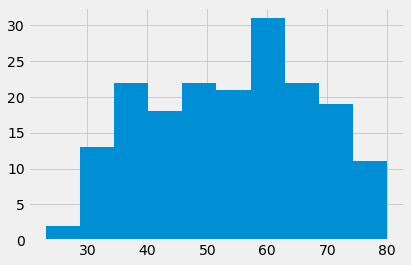

In [16]:
# Output a histogram representing the distribution for the possession variable
plt.hist(win_possession)

While certainly not perfectly symmetrical, a normal distribution might be a decent enough approximation for the simulated data set. This will be explored below.

<br>



##### Win shots

In [17]:
# Create series with the shots variable
win_shots = win_only_df['home_team_shots']

# Summary of shots variable
win_shots.describe()

count    181.000000
mean      12.696133
std        4.195426
min        5.000000
25%        9.000000
50%       13.000000
75%       16.000000
max       26.000000
Name: home_team_shots, dtype: float64

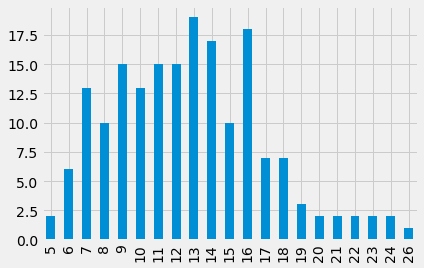

In [18]:
# Use the value_counts function to count each unique value in the shots columns
win_shots_distribution = win_only_df['home_team_shots'].value_counts()

# Sort the values for visualisation
win_shots_distribution = win_shots_distribution.sort_index()

# Plot on a bar chart
win_shots_distribution.plot(kind='bar')

Here, we can see the precise distribution of the winning team's shots when plotted on a bar chart. If we say that one shot is an *event*, we may be able to use a poisson distribution to simulate the shots variable. The poisson distribution is "...the discrete probability distribution of the number of events occurring in a given time period" [6]. We can let the time period for this variable be 90 minutes (or the length of a football match), with lamba equal to 12.69 shots, representing both the mean and variance. This will be explored further in section 3 below.

<br>

##### Relationship between variables

Next, I will examine the relationship between the variables for when result='W'. We would expect to see a positive linear relationship between possession and shots. Intuitively we might suggest that the more possession a team has, the more likely that team is to have more shots on goal. Below, I plot both variables on a scatter plot to visualise the relationship. Scatter plots provide an effective way of visualising trends between two variables. Using `numpy.polyfit` we can fit a line to the data [7].

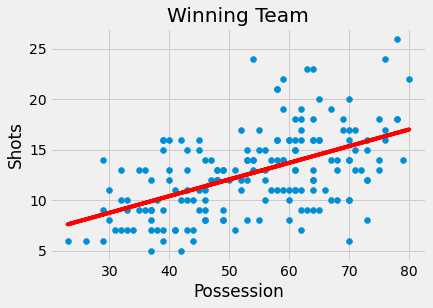

In [19]:
# Plot possession and shots on a scatter plot
plt.scatter(win_possession, win_shots)

# Fit line to data
m, b = np.polyfit(win_possession, win_shots, 1)


plt.title("Winning Team")
plt.xlabel("Possession")
plt.ylabel("Shots")

# Plot line on scatter plot
plt.plot(win_possession, m*win_possession + b, color='red')

There is a clear positive linear relationship between the two variables. In the context of real world football matches, this would indeed be expected, although there are some interesting outliers. The relationship is perhaps not as strong as one might have expected.

Using Pandas `.corr()` function we can calculate the Pearson Correlation Coefficient [7]. This value is a measure of the statistical relationship between two variables [8].

In [20]:
# Caculate Pearson's Correlation Coefficient
corr_win = win_possession.corr(win_shots)

# Print to the screen
print(corr_win)

0.5301493611687801


Here we see the correlation coefficient is approximately **0.53**. This indicates that the variables are *moderately* correlated: "Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated [9]."

<br>



#### 2.2.2 Lose dataset

<br>

In this section, I investigate the properties of the variables for when the home team lost. This process will follow in precisely the same path as the previous section to maintain consistency for the simulated data set below.

In [21]:
# Split dataframe based on result (losses)
lose_only_df = df1.loc[df1['home_team_result'] == 'L']
lose_only_df.head()

,home_team_possession,home_team_shots,home_team_result
1,40,11,L
3,66,11,L
4,37,6,L
9,42,8,L
14,61,9,L


<br>



<br>



##### Lose possession

In [22]:
# Create series with possession data only
lose_possession = lose_only_df["home_team_possession"]

# Summary of possession data
lose_possession.describe()

count    128.000000
mean      46.445312
std       13.953697
min       18.000000
25%       35.750000
50%       47.000000
75%       57.250000
max       78.000000
Name: home_team_possession, dtype: float64

Below, I plot the possession variable on a histogram. There is a much more obvious symmetry to this distribution than the *win_possession* variale. This would appear to follow a normal distribution, just from taking a quick look at the plot. This differs from the distribution for the same variable in the win dataset above, where the shape was less symmetrical. Below, we will explore what kind of impact this difference will have on the simulated data.

(array([ 6., 10., 16., 18., 16., 20., 16., 13.,  8.,  5.]),
 array([18., 24., 30., 36., 42., 48., 54., 60., 66., 72., 78.]),
 <a list of 10 Patch objects>)

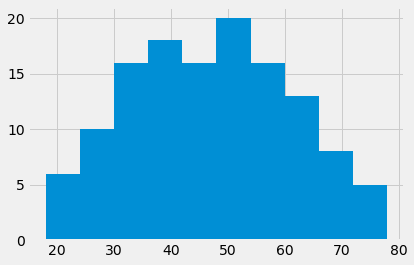

In [23]:
# Plot lose possession variable on a histogram
plt.hist(lose_possession)

<br>



##### Lose shots

In [24]:
# Create series with the shots variable
lose_shots = lose_only_df['home_team_shots']

# Summary of shots variable
lose_shots.describe()

count    128.000000
mean       9.562500
std        3.658127
min        0.000000
25%        7.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: home_team_shots, dtype: float64

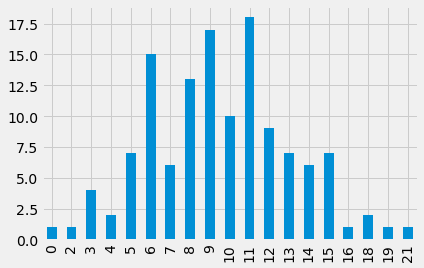

In [25]:
# Use the value_counts function to count each unique value in the shots columns
lose_shots_distribution = lose_only_df['home_team_shots'].value_counts()

# Sort the values for visualisation
lose_shots_distribution = lose_shots_distribution.sort_index()

# Plot on a bar chart
lose_shots_distribution.plot(kind='bar')

<br>



As would be expected, for the matches where the home team lost, we see a lower mean value for shots and possession when compared with the winning team. 

<br>

##### Relationship between variables
Let us now visualise the relationship between both variables on a scatter plot.

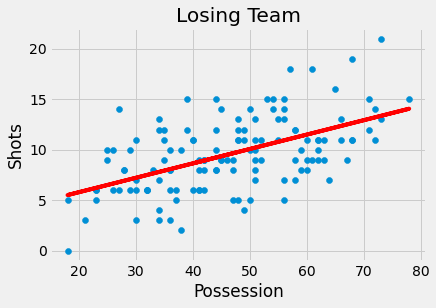

In [26]:
# Plot possession and shots on a scatter plot
plt.scatter(lose_possession, lose_shots)

# Fit line to data
m, b = np.polyfit(lose_possession, lose_shots, 1)


plt.title("Losing Team")
plt.xlabel("Possession")
plt.ylabel("Shots")

# Plot line on scatter plot
plt.plot(lose_possession, m*lose_possession + b, color='red')

In [27]:
# Caculate Pearson's Correlation Coefficient
corr_lose = lose_possession.corr(lose_shots)

# Print output to screem
print(corr_lose)

0.5435962829456304


Pearson's Correlation Coefficient is approximately **0.54**. There is a consistency here with the relationship observed above between these two variables for the winning team. Pearson's coefficient is almost identical, again moderately correlated.

#### 2.2.3 Draw dataset

<br>

The draw dataset will contain variable values pertaining to the drawn matches. As above with the win and lose datasets, I will investigate the properties of each variable and visualise their distributions. I will then compare each variable, examining their relationships.

<br>



In [28]:
# Split dataframe based on result (draws)
draw_only_df = df1.loc[df1['home_team_result'] == 'D']
draw_only_df

,home_team_possession,home_team_shots,home_team_result
6,57,10,D
8,47,10,D
10,51,8,D
20,28,9,D
21,49,16,D
...,...,...,...
367,35,6,D
368,70,14,D
374,46,8,D
377,53,7,D


<br>



##### Draw possession

In [29]:
# Create series with possession data only
draw_possession = draw_only_df["home_team_possession"]

# Summary of possession data
draw_possession.describe()

count    71.000000
mean     52.690141
std      12.418410
min      26.000000
25%      44.000000
50%      54.000000
75%      61.000000
max      76.000000
Name: home_team_possession, dtype: float64

(array([ 4.,  4.,  3.,  9.,  9., 11., 12.,  9.,  3.,  7.]),
 array([26., 31., 36., 41., 46., 51., 56., 61., 66., 71., 76.]),
 <a list of 10 Patch objects>)

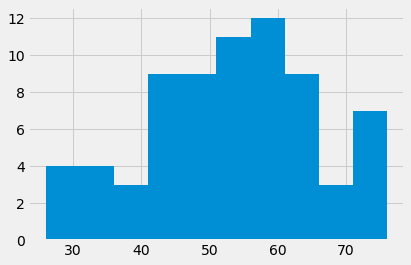

In [30]:
plt.hist(draw_possession)

<br>

From visualising the possession distribution for drawn games, we can see that there is a relatively high frequency of >70%. This might tell the story of a dominant team who could not manage to secure the winning goal, or of a team playing a conservative game, retaining majority possession but not willing to attack and settling for a draw. Either way, instant conclusions are not as intuitive as they might be for the win and lose equivalents.

###### Draw shots

<br>

In [31]:
# Create series with the shots variable
draw_shots = draw_only_df['home_team_shots']

# Summary of shots variable
draw_shots.describe()

count    71.000000
mean     11.042254
std       4.350490
min       0.000000
25%       8.000000
50%      10.000000
75%      13.500000
max      21.000000
Name: home_team_shots, dtype: float64

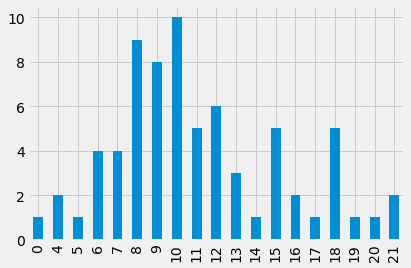

In [32]:
# Use the value_counts function to count each unique value in the shots columns
draw_shots_distribution = draw_only_df['home_team_shots'].value_counts()

# Sort the values for visualisation
draw_shots_distribution = draw_shots_distribution.sort_index()

# Plot on a bar chart
draw_shots_distribution.plot(kind='bar')

<br>



##### Relationship between variables
As above, I plot the variable relationship on a scatter plot

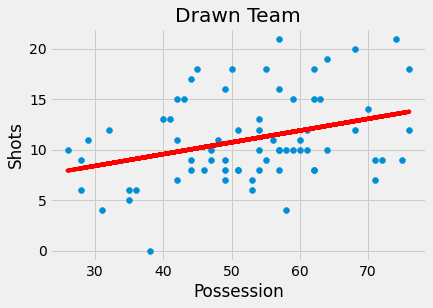

In [33]:
# Plot possession and shots on a scatter plot
plt.scatter(draw_possession, draw_shots)

# Fit line to data
m, b = np.polyfit(draw_possession, draw_shots, 1)


plt.title("Drawn Team")
plt.xlabel("Possession")
plt.ylabel("Shots")

# Plot line on scatter plot
plt.plot(draw_possession, m*draw_possession + b, color='red')

In [34]:
# Caculate Pearson's Correlation Coefficient
corr_draw = draw_possession.corr(draw_shots)

# Print to the screen
print(corr_draw)

0.3331532857392999


Calculating the Pearson Coefficient, we observe a low correlation, (approximately **0.33**) between the two variables for the drawn games. The notable difference in value here may be linked to the lower number of observations in the draw data set. There were 71 drawn matches in the 2018/2019 season, in contrast to 128 and 181 for lose and win respectively. Likewise, there could be any number of real world reasons for the difference: It is common for the weaker team to 'play for a draw' - try to retain possession without making attempts to score. It would be interesting to analyse this relationship in a greater number of observations. For the current project, I will stick to the data set at hand.

<br>



#### 2.2.4 Comparing features by categorical variable

Below, I plot each feature across the three categorical variables on the same figure. Viewed side by side, we can observe and compare each feature through visualisation.

First, I create a dataframe containing each of the three series (win_shots_distribution, lose_shots_distribution and draw_shots_distribution). I used code from a combination of these two blog plosts to generate this plot [9], [10]:

Text(0, 0.5, 'No. of Matches')

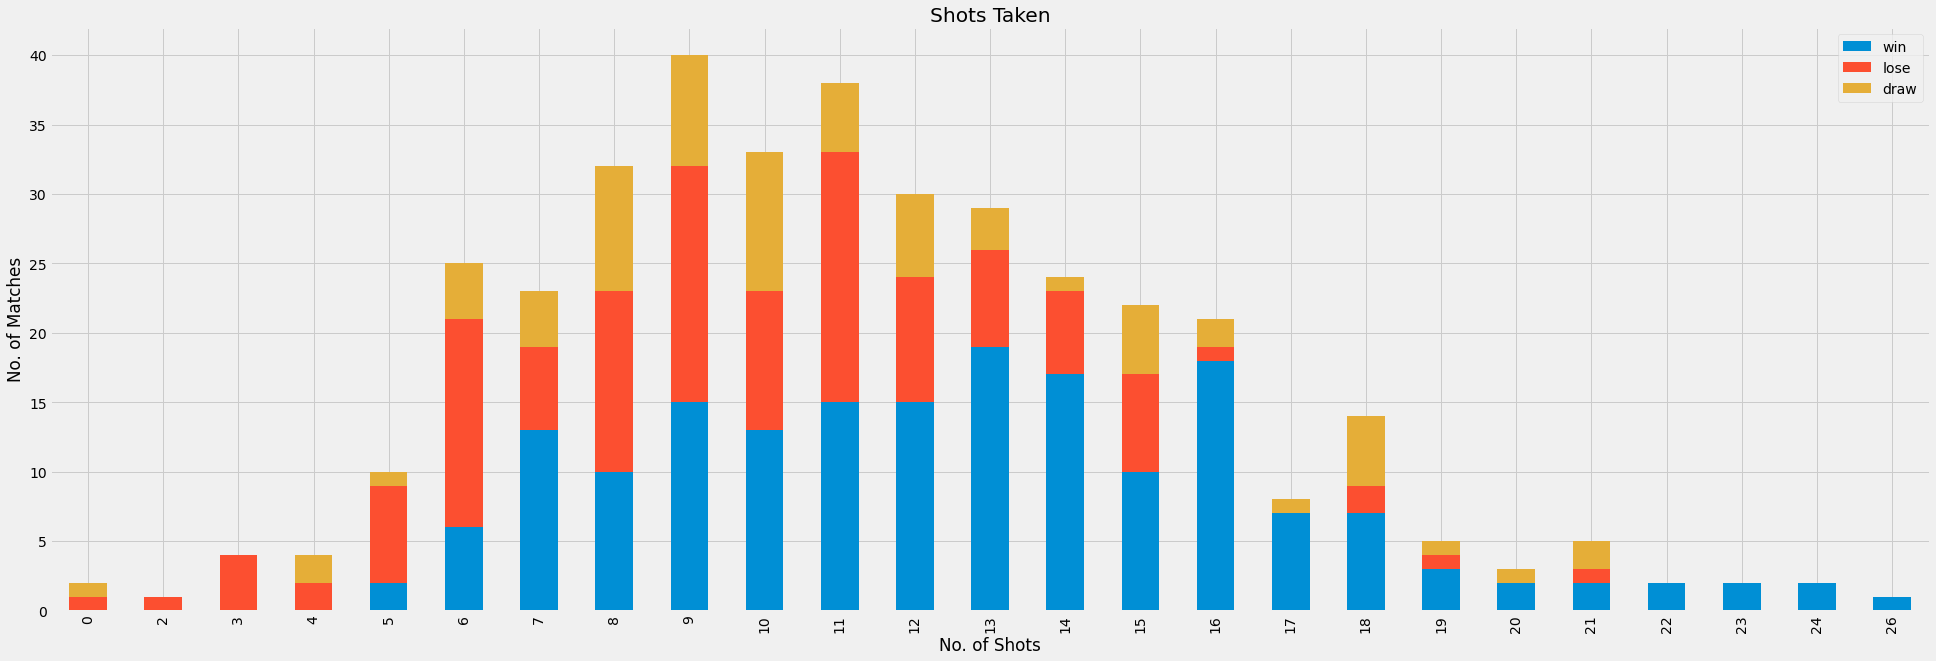

In [35]:
# Create a dictionary so we can combine the meta data for the series
shots_dict = { 'win': win_shots_distribution, 'lose': lose_shots_distribution, 'draw': draw_shots_distribution } 

# Create a dataframe from dict and plot on a bar graph
shots_comparison = pd.DataFrame(shots_dict) 
shots_comparison.plot(kind="bar", figsize=(30, 10), stacked=True)

plt.title("Shots Taken")
plt.xlabel("No. of Shots")
plt.ylabel("No. of Matches")

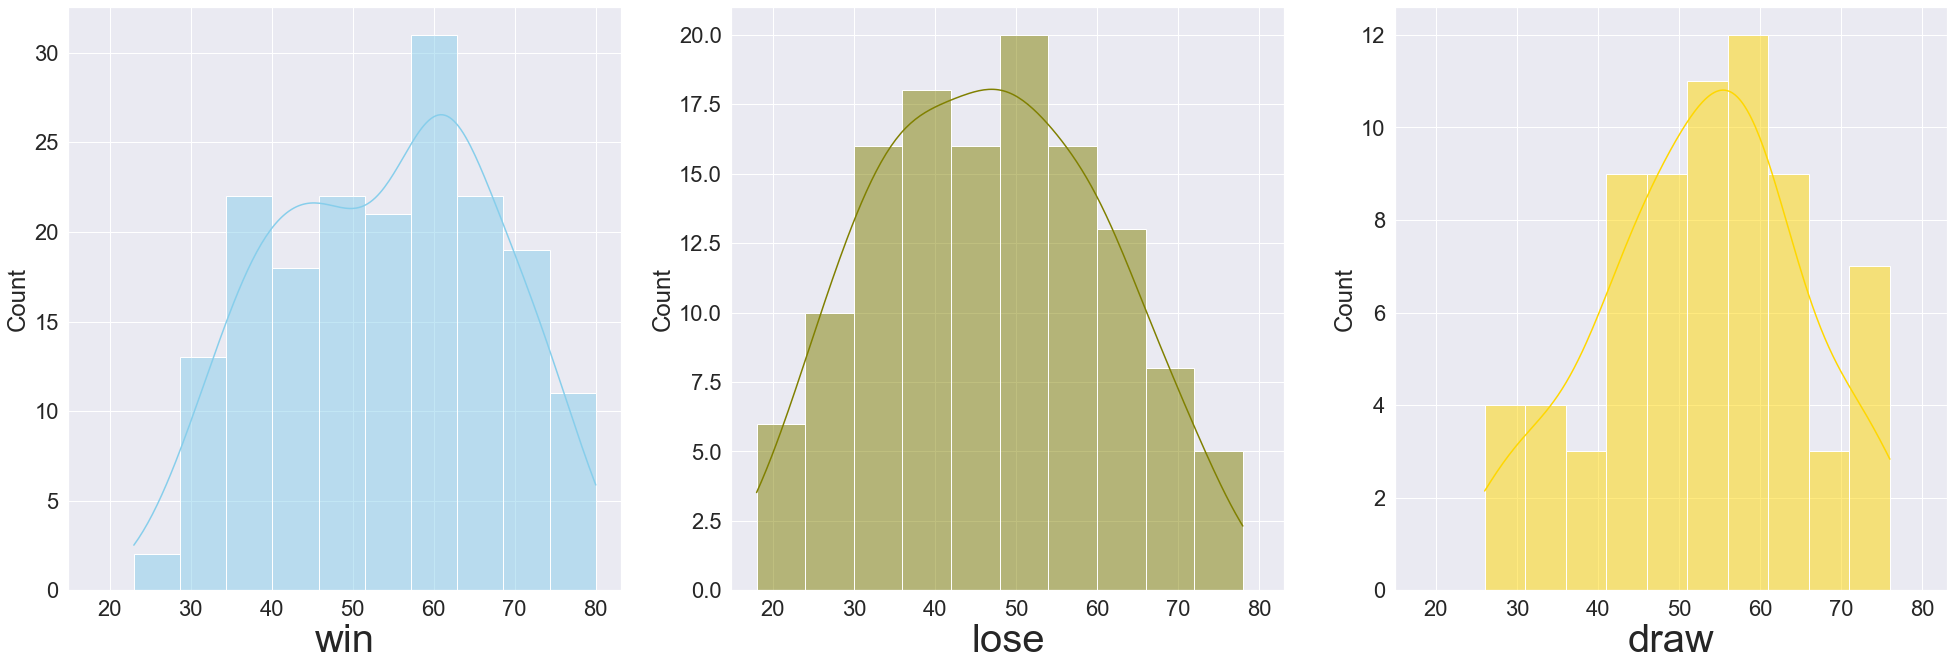

In [36]:
# 
sns.set(font_scale = 2)

# Create a dictionary so we can combine the meta data for the series
possession_dict = { 'win': win_possession, 'lose': lose_possession, 'draw': draw_possession } 

# Create a dataframe from the dict
possession_comparison = pd.DataFrame(possession_dict) 

# plot on three separate histograms side by side 
f, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=True)

axes[0].set_xlabel('win', fontdict={'fontsize' : 40})
axes[1].set_xlabel('lose', fontdict={'fontsize' : 40})
axes[2].set_xlabel('draw', fontdict={'fontsize' : 40})

sns.histplot( possession_comparison["win"] , bins=10, color="skyblue", kde=True, ax=axes[0])
sns.histplot( possession_comparison["lose"] , bins=10, color="olive", kde=True, ax=axes[1])
sns.histplot( possession_comparison["draw"] , bins=10, color="gold", kde=True, ax=axes[2])

#### 2.2.5 BMI

<br>

In England for the age group 20-44, the average BMI is around 26.2kg/m²[4]. It has been demonstrated that the optimal BMI for footballers is somewhere around 22Kg/m² [5]. 

There are numerous studies which demonstrate a negative correlation between BMI and physical fitenss/sports performance [6], [7]. In one such study conducted by Pantelis Theo Nikolaidis (2012) [6] on the association between BMI, body fat and muscle power output in soccer players, a hypothesised inverse relationship between BMI, body fat and physical fitness in soccer players was confirmed. More specifically, and more relevant to the current project, it was concluded that there was an inverse correlation between muscle power output and BMI. 

It must be added that the relationship between BMI and performance in football is not an exact science. There are innumerable factors at play when assessing the quality of sports performance genrally. Indeed, according to NHS standards, at least 25 Premier League players are overweight [7]. BMI should always be used merely as a guide to associated physical fitness and performance. This is something that was necessary to bear in mind for the generation of the synthesised data below. 


##### Distriubtion of BMI

While there has been some debate around the distribution of BMI in the population as a whole [8], with some commentators detecting a right skewness with increasing age, when confined to given age ranges it does appear to follow a normal distribution [9]. For the purposes of this project, BMI will follow a normal distribution.

(array([ 6.,  8., 23., 31., 44., 33., 14., 14.,  6.,  2.]),
 array([24.37380715, 24.97516529, 25.57652343, 26.17788157, 26.77923971,
        27.38059785, 27.98195599, 28.58331413, 29.18467227, 29.78603041,
        30.38738855]),
 <a list of 10 Patch objects>)

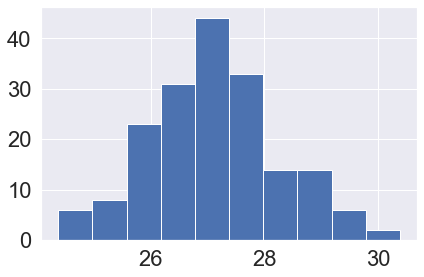

In [37]:
rng = np.random.default_rng()

mu, sigma = 27, 1.15 # mean and standard deviation

win_bmi = rng.normal(mu, sigma, 181)
plt.hist(win_bmi)

<br>



## 3. Simulation

***

In this section, I apply the variable characteristics established in section 2 in order to generate a simulated data set. Using the `numpy.random` package, I generate values for each variable according to the properties and relationships investigated above. In order to populate the synthesised data set, it is once again necessary to divide the task into the 3 relevant sections - for win, lose and draw. The variable investigation in Section 2 has been guided by the categorical variable. For each category, the independent variables exhibit distinct behaviour. It is my aim to capture this in the simulated data set.

<br>



First of all, I construct a new Generator as recommended in the `numpy.random` documentation [8]. This constructs a new Generator with `numpy.random`'s BitGenerator (PCG64)

In [38]:
# Construct new Generator
rng = np.random.default_rng()

<br>



#### Categorical variable - 'result'

The simulated data set will be populated according to the values corresponding to each target variable i.e win, lose and draw. It is this column therefore which will be the first added to the new dataframe:

I create a list containing each variable

In [39]:
# Create a list containing each categorical variable
sim_result = ['W', 'L', 'D']

Next, I calculate the proportion of each one as they appear in the real world data set:

In [40]:
# Calculate the proportion of each result in the real world data set
W, L, D = 181/380, 128/380, 71/380

# Add probabilities to a list
result_prob = [W, L, D]

These values will be passed to the probability parameter of the `random.choice` function in order to distribute them according to the real world data set:

In [41]:
# Each of the categorical variables chosen at random and distributed according to the probability values 
# calculated above
sim_results = rng.choice(sim_result, 500, p=result_prob)

Next, I create a new dataframe containing the simulated results column generated above:

In [42]:
# Create new simulated dataframe with result column
sim_df = pd.DataFrame(sim_results, columns = ['result']) 

# Output the new dataframe
sim_df.head(-10)

,result
0,L
1,W
2,W
3,L
4,W
...,...
485,D
486,L
487,W
488,W


#### Simulating variable relationships

For each of the three independent variables, I will generate data using `numpy.random`. In the simulation of a data set which is intended to represent a phenomenon as accurately as possible, it is not enough to simply generate data for each variable as a stand-alone feature. The relationship between each one must be taken into account. With this in mind, I have taken two distinct steps.

Firstly, I generate values for each independent variable according to their relationship with the target variable. As explored above, the data points pertaining to each category have distinct properties which must be expressed separately.

Second, within each category subset, the relationship between independent variables is simulated using the `numpy.random.multivariate_normal` function. This function generates correlated data, with both variables following a normal distribution. While not every variable is distributed precisely normally in the current project, the simuated data does appear to broadly reflect the real world. This is demonstrated further below

<br>


### 3.1 Win

<br>


The next step is to populate the new dataframe with the simulated data. This will be done category by category and column by column. The first category will be 'W' (win).

##### 3.1.1 Shots

<br>

There are a number of approaches one could take to simulate the data for the shots variable. As seen above for the 'results' variable, `numpy.random.choice` allows for quite fine grain control of the simulated data points with the *p* parameter. The values generated will closely mirror the source data set (see below). 

When using `random.choice`, the probability values (*p*) must add to 1. When I sum the probability values together below, we see the total is just under 1. The `random.choice` will not work unless this value is exactly 1. I found an informative discussion on stackoverflow.com dealing with this very issue [13]. I have implemented the solution below. 

In [43]:
# Divide the frequency of each number of shots taken by total number of matches won and add to list
win_shots_prob = list(win_shots_distribution / 181)

# Print sum of probability values to the screen
print(sum(win_shots_prob))

0.9999999999999998


In [44]:
# Convert to array
win_shots_prob = np.array(win_shots_prob)

# Divide by the sum of its elements. This normalizes the probabilities.
win_shots_prob /= win_shots_prob.sum()

# Output sum of probabilities
win_shots_prob.sum()

1.0

<br>

As above, I create a list of the unique values for win_shots:

In [45]:
# Get unique values from win_shots and store them in a set
win_shots_set = set(win_shots)

# Convert the set to a list 
win_shots_list = list(win_shots_set)

# Output the list
print(win_shots_list)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26]


<br>

Now we are ready to generate our simulated values for the win_shots variable:

In [46]:
# Generate array of simulated data for shots variable
win_shots_sim = rng.choice(win_shots_list, 181, p=win_shots_prob)

In [47]:
# Convert array to pandas series
win_shots_sim = pd.Series(win_shots_sim)

# Count the frequency of each value in the series
win_shots_sim_distribution = win_shots_sim.value_counts()

# Sort the values
win_shots_sim_distribution = win_shots_sim_distribution.sort_index()

Text(0, 0.5, 'No. of Matches')

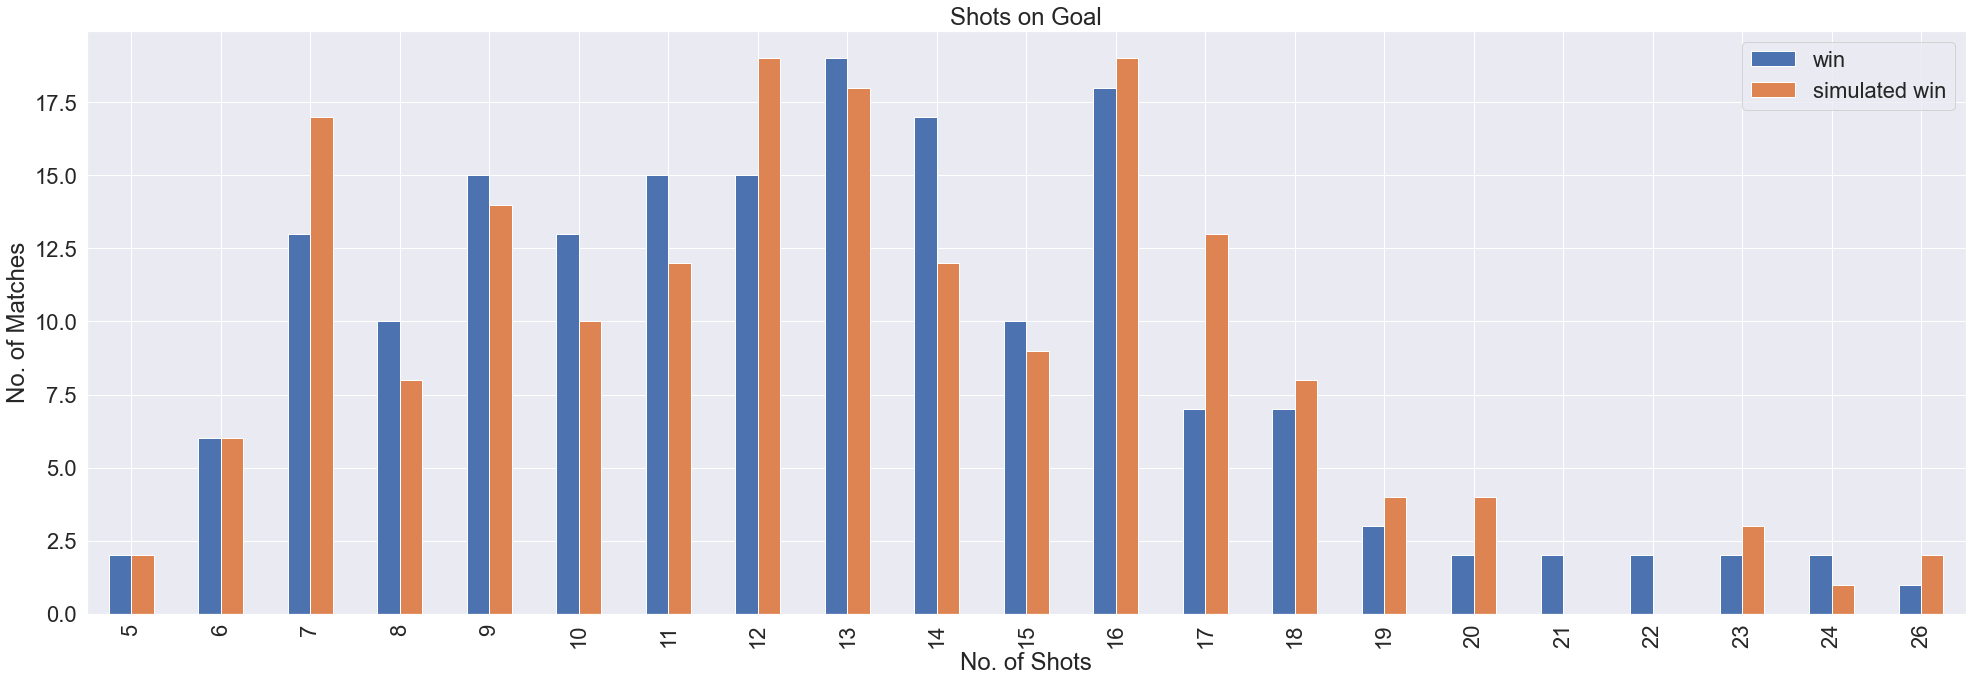

In [48]:
# Create a dictionary so we can combine the meta data for the series
sim_shots_dict = { 'win': win_shots_distribution, 'simulated win': win_shots_sim_distribution }

# Create a dataframe and store it in 
sim_shots_comparison = pd.DataFrame(sim_shots_dict) 
sim_shots_comparison.plot(kind="bar", figsize=(30, 10))

plt.title("Shots on Goal")
plt.xlabel("No. of Shots")
plt.ylabel("No. of Matches")

With this visualisation we see how closely the simulated data set resembles the real world data set. 

Using `random.choice` may be an appropriate option in certain circumstance, however for the present project it brings with it some drawbacks. It does not aptly express the randomness one would expect to observe throughout a full season. To base a simulation so closely on a single season only is far too limiting. The `.choice` function will never generate a value below 5 or above 26, or even exactly 25 shots on goal, because these values were not observed during the 2018/2019 Premier League season. Of course, this number of shots could indeed be observed in any given season of football, no matter the standard of football being played or quality of team playing. For this reason, an array of values following an appropriate distribution is a more suitable approach to take.

#### Poisson distribution

As mentioned above, the shots variable may be suitably represented by a poisson distribution. The `.poisson()` distribution function is available as part of the `numpy.random` package. The poisson distribution is a discrete probability distribution of the number of events occuring in a given time period. We can let the time period for this variable be 90 minutes (or the length of a football match), with lamba equal to 12.69 shots, representing both the mean and variance.

For a variable to be distributed according to a poisson distribution, each event must be completely random i.e. completely independent of one another [14]. This does not hold true in the real world of football where shots on goal are concerned. 

In [49]:
sim_shots_pois = rng.poisson(12.6, 181)

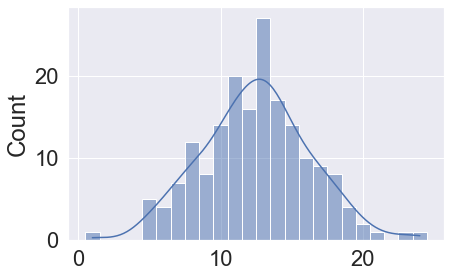

In [50]:
sns.histplot(sim_shots_pois, kde=True, discrete=True)

#### Correlation

As mentioned above, if we want to synthesise a given correlation between variables for a simulated data set, the `numpy.random` package offers a useful tool in the `random.multivariate_normal` function. There are limitations with this function in the sense that both variables must follow a normal distribution. However, as demonstrated above, there are limitations with other attempts at accurate simulation. Fake data will never serve as a wholly appropriate replacement for real world data [15]. Sacrifices will always need to be made, and a certain amount of inherent bias is unavoidable [16]. I have taken a number of approaches to generate as accurate a data set as possible and the most useful solution I have found to date involves using the `random.multivariate_normal` function. 


Using code found at realpython.com [17], I generate the correlated data with the `random.multivariate_normal` function. This function takes the *means* of both variables and *covariance matrix* as parameters. Using `numpy.cov`, we can generate a covariance matrix. To filter out extreme and unrealistic outliers, I add a line of code which removes an values outside 2.4 standard deviations from the mean [18]. After some trial and error I found that this was the optimal number of standard deviations to apply:

In [212]:
# Set random seed to keep values consistent
np.random.seed(444)

# Standard deviations/means of win_possession and win_shots, respectively
stdev = np.array([13.482255, 4.195426])
mean = np.array([53.867403, 12.696133])

# Generate covariance matrix
cov = np.cov(win_possession, win_shots)

#Generate correlated variables
win_poss_shots_sim = np.random.multivariate_normal(mean=mean, cov=cov, size=238)

# Convert to Pandas dataframe
win_sim_df = pd.DataFrame(win_poss_shots_sim, columns=['Possession', 'Shots'])

# Remove unrealistic outliers
win_sim_df = win_sim_df[np.abs(win_sim_df.Possession-df4.Possession.mean()) <= (2.4*win_sim_df.Possession.std())]

#win_poss_shots_sim[:10]
win_sim_df.head()

,Possession,Shots
0,48.822598,13.147903
1,34.531307,13.460879
2,67.216364,10.987386
3,61.508435,12.094211
4,50.929030,12.933596


In [219]:
win_sim_df["Shots"].describe()

count    230.000000
mean      12.656274
std        4.153594
min        3.201995
25%       10.062130
50%       12.421094
75%       15.382919
max       23.034846
Name: Shots, dtype: float64

Next, I generate random data for the BMI variable. As discussed above, BMI is inversely related to both possession and shots. Through trial and error, I have found that a correlation coefficient of -0.5 best represents reality following my reasearch on the relationship between BMI and the other two variables. 

First, using a function found on realpython.com [19], I generate a covariance matrix. I then generate correlated data for the possession and BMI variables:

In [213]:
# Generate a covariance matrix from correlation and standard deviations
def corr2cov(p: np.ndarray, s: np.ndarray) -> np.ndarray:
    d = np.diag(s)
    return d @ p @ d

In [214]:
# Keep the same random seed
np.random.seed(444)

# Create matrix of correlation coefficients
corr_bmi = np.array([[1., -0.50],
                   [-0.50, 1.]])


# Standard deviations and means of both variables
stdev_bmi = np.array([14.103586, 1.795426])
mean_bmi = np.array([53.582737, 24.696133])

# Call function which returns covariance matrix
cov_bmi = corr2cov(corr_bmi, stdev_bmi)

# Generate correlated dat for possession and BMI
win_poss_bmi = np.random.multivariate_normal(mean=mean_bmi, cov=cov_bmi, size=234)

# View first 10 rows
win_poss_bmi[:10]

array([[ 48.57934604,  25.60555145],
       [ 34.20458986,  27.77258126],
       [ 66.7155072 ,  22.07246016],
       [ 61.17814238,  23.35355186],
       [ 50.66315478,  25.21496155],
       [ 35.61900179,  24.59826616],
       [100.08624559,  20.44557162],
       [ 58.57670754,  23.00541714],
       [ 51.45510904,  25.22233891],
       [ 52.38534251,  23.36778139]])

In [229]:
# Keep the same random seed
np.random.seed(444)

# Create matrix of correlation coefficients
corr_bmi = np.array([[1., -0.50],
                   [-0.50, 1.]])


# Standard deviations and means of both variables
stdev_bmi2 = np.array([4.153594, 1.795426])
mean_bmi2 = np.array([12.656274, 24.696133])

# Call function which returns covariance matrix
cov_bmi2 = corr2cov(corr_bmi, stdev_bmi2)

# Generate correlated dat for possession and BMI
win_shots_bmi2 = np.random.multivariate_normal(mean=mean_bmi2, cov=cov_bmi2, size=234)

win_shots_bmi2 = pd.DataFrame(win_shots_bmi2, columns=['Shots', 'BMI'])


# View first 10 rows
win_shots_bmi2

,Shots,BMI
0,11.315710,25.619629
1,7.367639,27.849456
2,16.123649,22.047379
3,14.699549,23.330278
4,11.871461,25.223769
...,...,...
229,2.426136,26.962734
230,9.088446,25.618111
231,5.884106,25.686705
232,13.549448,25.532214


In [230]:
win_shots_bmi2["Possession"] = win_sim_df["Possession"]

In [231]:
win_shots_bmi2

,Shots,BMI,Possession
0,11.315710,25.619629,48.822598
1,7.367639,27.849456,34.531307
2,16.123649,22.047379,67.216364
3,14.699549,23.330278,61.508435
4,11.871461,25.223769,50.929030
...,...,...,...
229,2.426136,26.962734,20.893047
230,9.088446,25.618111,42.215462
231,5.884106,25.686705,32.628075
232,13.549448,25.532214,55.551693


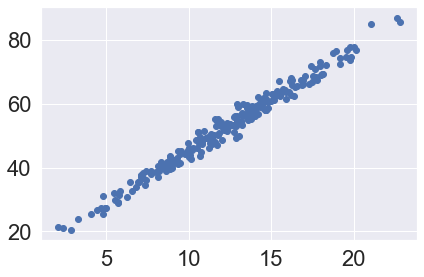

In [234]:
plt.scatter(win_shots_bmi2["Shots"], win_shots_bmi2["Possession"])

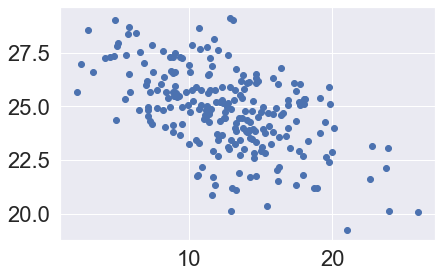

In [227]:
plt.scatter(win_shots_bmi2[:, 0], win_shots_bmi2[:, 1])

In [ ]:
bmi_df2 = pd.DataFrame()

The possession data has already been generated so I am only interested in retaining the BMI data:

In [215]:
bmi_df = pd.DataFrame(win_poss_bmi[:, 1], columns=["BMI"])
bmi_df

,BMI
0,25.605551
1,27.772581
2,22.072460
3,23.353552
4,25.214962
...,...
229,26.647084
230,25.513752
231,25.455543
232,25.604807


I now merge this dataframe with the one containing possession and shots data:

In [216]:
win_sim_df = pd.merge(win_sim_df, bmi_df, left_index=True, right_index=True)
win_sim_df

,Possession,Shots,BMI
0,48.822598,13.147903,25.605551
1,34.531307,13.460879,27.772581
2,67.216364,10.987386,22.072460
3,61.508435,12.094211,23.353552
4,50.929030,12.933596,25.214962
...,...,...,...
229,20.893047,6.214808,26.647084
230,42.215462,10.708800,25.513752
231,32.628075,7.346685,25.455543
232,55.551693,15.409388,25.604807


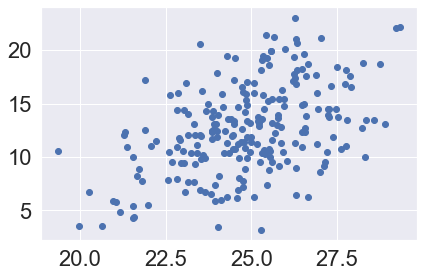

In [217]:
plt.scatter(win_sim_df["BMI"], win_sim_df["Shots"])

In [210]:
np.random.seed(444)

# Return matrix of Pearson correlation coefficients
#r1 = np.corrcoef(win_possession, win_shots)

#corr = r1

# Standard deviations/means of win_possession and win_shots, respectively
# stdev = np.array([13.482255, 4.195426])
mean = np.array([53.867403, 12.696133, 23.6])

# Returns covariance matrix
x = np.vstack([win_sim_df["Possession"], win_sim_df["Shots"], win_sim_df["BMI"]])
cov = np.cov(x)

win_poss_shots_sim = np.random.multivariate_normal(mean=mean, cov=cov, size=238)
win_poss_shots_sim[:10]

array([[49.49248276, 10.63916116, 23.35216198],
       [38.45205984, 13.35141276, 26.07194282],
       [60.51805552, 15.73528196, 23.93958885],
       [51.75554188,  7.92225361, 21.87998488],
       [95.55881673, 22.57883998, 21.84778217],
       [65.1529038 , 14.07943594, 22.57887743],
       [52.44175905, 15.60186202, 25.03288351],
       [31.80187898,  6.95086429, 24.3094884 ],
       [45.36926403,  8.43358092, 23.00558869],
       [50.18941099, 14.72271602, 24.98141412]])

In [211]:
cov

array([[162.45357503,  25.92343105, -12.15466848],
       [ 25.92343105,  16.24620821,   3.18607869],
       [-12.15466848,   3.18607869,   3.07896785]])

In [235]:
x1 = np.vstack([win_shots_bmi2["Possession"], win_shots_bmi2["Shots"], win_shots_bmi2["BMI"]])
cov1 = np.cov(x1)
cov1

array([[        nan,         nan,         nan],
       [        nan, 18.41400998, -4.37836172],
       [        nan, -4.37836172,  3.59405434]])

In [188]:
new_df = pd.merge(df3, df4, left_index=True, right_index=True)
new_df["Result"] = 'W'
new_df

,Possession_x,Shots,BMI,Possession_y,Result
0,48.822598,13.147903,25.624266,48.583311,W
1,34.531307,13.460879,27.879275,34.216956,W
2,67.216364,10.987386,22.041501,66.703513,W
3,61.508435,12.094211,23.322228,61.172378,W
4,50.929030,12.933596,25.226791,50.665389,W
...,...,...,...,...,...
176,57.933068,18.258814,26.242476,58.860022,W
177,51.590780,5.535596,22.264113,49.775629,W
178,60.409538,12.102764,23.489617,60.064443,W
179,39.653950,13.913104,27.289469,39.485372,W


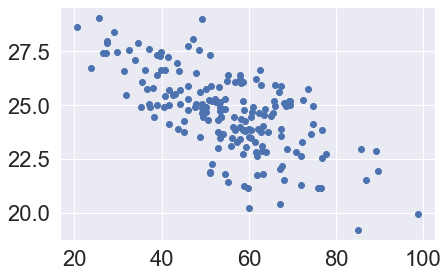

In [86]:
plt.scatter(new_df["Possession"], new_df["BMI"])

In [ ]:
df3["Possession"].describe()

array([[ 48.58331096,  25.62426638],
       [ 34.21695642,  27.87927508],
       [ 66.70351291,  22.0415015 ],
       [ 61.17237805,  23.32222791],
       [ 50.66538901,  25.22679053],
       [ 35.61068124,  24.92357312],
       [100.077577  ,  19.94912017],
       [ 58.56749833,  23.04683511],
       [ 51.45773064,  25.21959124],
       [ 52.37592221,  23.49091823]])

In [114]:
df4 = df4[np.abs(df4.Possession-df4.Possession.mean()) <= (3*df4.Possession.std())]
df4 = df4[np.abs(df4.BMI-df4.BMI.mean()) <= (3*df4.BMI.std())]

df4

,BMI,Possession
0,25.624266,48.583311
1,27.879275,34.216956
2,22.041501,66.703513
3,23.322228,61.172378
4,25.226791,50.665389
...,...,...
176,26.242476,58.860022
177,22.264113,49.775629
178,23.489617,60.064443
179,27.289469,39.485372


In [117]:
df4["Possession"].describe()

count    180.000000
mean      54.292707
std       14.155113
min       19.339942
25%       44.814700
50%       54.837800
75%       63.022129
max       91.209573
Name: Possession, dtype: float64

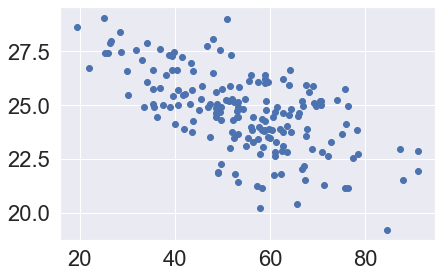

In [115]:
plt.scatter(df4["Possession"], df4["BMI"])

In [104]:
bmi_trial = pd.Series(data_inv[:, 1])
df4 = pd.DataFrame(bmi_trial, columns=["BMI"])
df4["Possession"] = possession_trial
df4

,BMI,Possession
0,25.624266,48.583311
1,27.879275,34.216956
2,22.041501,66.703513
3,23.322228,61.172378
4,25.226791,50.665389
...,...,...
176,26.242476,58.860022
177,22.264113,49.775629
178,23.489617,60.064443
179,27.289469,39.485372


In [73]:
possession_trial = pd.Series(data_inv[:, 0])

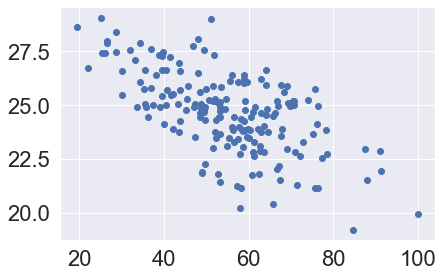

In [74]:
plt.scatter(possession_trial, bmi_trial)

In [ ]:
# Fill result column with W value
df3["result"] = 'W'

In [ ]:
df3

In [ ]:
# Create 
win_possession_sim = pd.Series(win_poss_shots_sim[:,0])

win_shots_sim = pd.Series(win_poss_shots_sim[:, 1])

plt.scatter(win_possession_sim, win_shots_sim)

##### 3.1.3 Possession

<br>

To simulate the data for the possession variable, I will use the `random.normal` function to generate an array of values normally distributed. Using `pandas` `describe` function once again, we can see the mean $\mu$ and standard deviation $\sigma$ and apply these values to our simulated data. The `random.normal` function takes these two values as parameters in order to generate random data in the normal distribution.

In [ ]:
win_possession.describe()

In [ ]:
# Assign values for mu and sigma based on real world data set
mu, sigma = 53.867403, 13.482255

# generate random values for simulated possession variable
sim_possession_norm = np.random.default_rng().normal(mu, sigma, 200)

<br>



Let's plot this on a graph and compare with the real world data set. <br>

First, I will convert *sim_possesion_norm* to a pandas series

In [ ]:
# Convert array to pandas series
sim_possession_norm = pd.Series(sim_possession_norm)

In [ ]:
# Create a dictionary so we can combine the meta data for the series
sim_possession_dict = { 'win': win_possession, 'win sim': sim_possession_norm } 

# Create a dataframe and store it in 
sim_possession_comparison = pd.DataFrame(sim_possession_dict) 

# plot
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
sns.histplot( sim_possession_comparison["win"] , bins=10, color="skyblue", kde=True, ax=axes[0])
sns.histplot( sim_possession_comparison["win sim"] , bins=10, color="olive", kde=True, ax=axes[1])

Viewed side by side, we can see there is a notable difference in the shape of both distributions. The simulated data clearly has a more pronounced bell-shaped curve. 

<br>



We now have our simulated values for all our variables for the *win* subset. Let's populate our simulated data set with these values. Using a for loop, I populate each variable column for when *result = 'W'*. My idea for this code came from a blog post found on towardsdatascience.com [14].

In [ ]:
# sim_df["possession"] = 0
sim_df["possession"] = sim_possession_norm
sim_df["shots"] = 0
win_shots_sim2 = rng.poisson(12.6, 200)

# for i in range(len(sim_df)):
#     if sim_df["result"][i]=="W":
#         for i in 
#         sim_df["goals scored"][i]=rng.choice(win_goal_count_sim, 1)
#         sim_df["possession"][i]=rng.choice(sim_possession_norm, 1)
#         sim_df["shots"][i]=rng.choice(win_shots_sim, 1)
#         sim_df["shots"][i]=rng.poisson(12.6, 200)

for i in range(len(sim_df)):
    if sim_df["possession"][i] > 50:
        sim_df["shots"][i]=rng.choice(win_shots_sim2)
        

In [ ]:
win_shots_sim2

In [ ]:
sim_df.head(20)

Taking a quick look at the first twenty values of the simulated data set, they appear to match the real world data quite accurately.

<br>



To populate the rest of the data set I will now perform the execute the same code for the *draw* and *lose* categorical variables:

### 3.2 Lose

<br>

For each variable in the lose subset, the procedure is precisely the same as for the win subset: 

<br>



##### 3.2.2 Shots

In [ ]:
# Divide the frequency of each number of shots taken by total number of matches won and add to list
lose_shots_prob = list(lose_shots_distribution / 128)


sum(lose_shots_prob)

In [ ]:
# Get unique values from win_shots and store them in a set
lose_shots_set = set(lose_shots)

# Convert the set to a list 
lose_shots_list = list(lose_shots_set)

# Output the list
print(lose_shots_list)

In [ ]:
# Generate array of simulated data for shots variable
lose_shots_sim = rng.choice(lose_shots_list, 200, p=lose_shots_prob)

In [ ]:
# Convert array to pandas series
lose_shots_sim = pd.Series(lose_shots_sim)

# Count the frequency of each value in the series
lose_shots_sim_distribution = lose_shots_sim.value_counts()

# Sort the values
lose_shots_sim_distribution = lose_shots_sim_distribution.sort_index()

In [ ]:
# Create a dictionary so we can combine the meta data for the series
lose_sim_shots_dict = { 'lose': lose_shots_distribution, 'simulated lose': lose_shots_sim_distribution }

# Create a dataframe and store it in 
lose_sim_shots_comparison = pd.DataFrame(lose_sim_shots_dict) 
lose_sim_shots_comparison.plot(kind="bar")

plt.title("Shots on Goal")
plt.xlabel("No. of Shots")
plt.ylabel("No. of Matches")

<br>



##### 3.2.3 Possession

<br>

In [ ]:
lose_possession.describe()

In [ ]:
# Assign values for mu and sigma based on real world data set
mu, sigma = 46.445312, 13.953697

# generate random values for simulated possession variable
lose_sim_possession_norm = np.random.default_rng().normal(mu, sigma, 200)

In [ ]:
# Convert array to pandas series
lose_sim_possession_norm = pd.Series(lose_sim_possession_norm)

In [ ]:
# Create a dictionary so we can combine the meta data for the series
lose_sim_possession_dict = { 'lose': lose_possession, 'lose sim': lose_sim_possession_norm } 

# Create a dataframe and store it in 
lose_sim_possession_comparison = pd.DataFrame(lose_sim_possession_dict) 

# plot
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
sns.distplot( lose_sim_possession_comparison["lose"] , bins=10, color="skyblue", ax=axes[0])
sns.distplot( lose_sim_possession_comparison["lose sim"] , bins=10, color="olive", ax=axes[1])

<br>



In [ ]:
# sim_df["goals scored"] = 0
# sim_df["possession"] = 0
# sim_df["shots"] = 0

for i in range(len(sim_df)):
    if sim_df["result"][i]=="L":
        sim_df["goals scored"][i]=rng.choice(lose_goal_count_sim, 1)
        sim_df["possession"][i]=rng.choice(lose_sim_possession_norm, 1)
        sim_df["shots"][i]=rng.choice(lose_shots_sim, 1)

In [ ]:
sim_df.head(20)

<br>



### 3.3 Draw

<br>

<br>



##### 3.3.2 Shots

In [ ]:
# Divide the frequency of each number of shots taken by total number of matches won and add to list
draw_shots_prob = list(draw_shots_distribution / 71)


sum(draw_shots_prob)

In [ ]:
# Get unique values from draw_shots and store them in a set
draw_shots_set = set(draw_shots)

# Convert the set to a list 
draw_shots_list = list(draw_shots_set)

# Output the list
print(draw_shots_list)

In [ ]:
# Generate array of simulated data for shots variable
draw_shots_sim = rng.choice(draw_shots_list, 200, p=draw_shots_prob)

In [ ]:
# Convert array to pandas series
draw_shots_sim = pd.Series(draw_shots_sim)

# Count the frequency of each value in the series
draw_shots_sim_distribution = draw_shots_sim.value_counts()

# Sort the values
draw_shots_sim_distribution = draw_shots_sim_distribution.sort_index()

In [ ]:
# Create a dictionary so we can combine the meta data for the series
draw_sim_shots_dict = { 'draw': draw_shots_distribution, 'simulated draw': draw_shots_sim_distribution }

# Create a dataframe and store it in 
draw_sim_shots_comparison = pd.DataFrame(draw_sim_shots_dict) 
draw_sim_shots_comparison.plot(kind="bar")

plt.title("Shots on Goal")
plt.xlabel("No. of Shots")
plt.ylabel("No. of Matches")

<br>



##### 3.3.3 Possession


In [ ]:
draw_possession.describe()

In [ ]:
# Assign values for mu and sigma based on real world data set
mu, sigma = 52.690141, 12.418410

# generate random values for simulated possession variable
draw_sim_possession_norm = np.random.default_rng().normal(mu, sigma, 200)

In [ ]:
# Convert array to pandas series
draw_sim_possession_norm = pd.Series(draw_sim_possession_norm)

In [ ]:
# Create a dictionary so we can combine the meta data for the series
draw_sim_possession_dict = { 'draw': draw_possession, 'draw sim': draw_sim_possession_norm } 

# Create a dataframe and store it in 
draw_sim_possession_comparison = pd.DataFrame(draw_sim_possession_dict) 

# plot
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
sns.distplot( draw_sim_possession_comparison["draw"] , bins=10, color="skyblue", ax=axes[0])
sns.distplot( draw_sim_possession_comparison["draw sim"] , bins=10, color="olive", ax=axes[1])

In [ ]:
list = [1.2, 1.5, 3.6]
rng.choice(list)

In [ ]:
# sim_df["goals scored"] = 0
# sim_df["possession"] = 0
# sim_df["shots"] = 0

for i in range(len(sim_df)):
    if sim_df["result"][i]=="D":
        sim_df["goals scored"][i]=rng.choice(draw_goal_count_sim, 1)
        sim_df["possession"][i]=rng.choice(draw_sim_possession_norm, 1)
        sim_df["shots"][i]=rng.choice(draw_shots_sim, 1)

In [ ]:
sim_df.head()

In [ ]:
plt.scatter(draw_sim_possession_norm, draw_shots_sim)

In [ ]:
# Start with a correlation matrix and standard deviations.
# -0.40 is the correlation between A and B, and the correlation
# of a variable with itself is 1.0.
# corr = np.array([[1., -0.40],
#                   [-0.40, 1.]])

corr = np.array([[1., -0.60],
                   [-0.60, 1.]])



# Standard deviations/means of A and B, respectively
# stdev = np.array([6., 1.])
# mean = np.array([2., 0.5])
# cov = corr2cov(corr, stdev)


stdev = np.array([13.482255, 2.795426])
mean = np.array([53.867403, 27.696133])
cov = corr2cov(corr, stdev)


# `size` is the length of time series for 2d data
# (500 months, days, and so on).
data_inv = np.random.multivariate_normal(mean=mean, cov=cov, size=200)
data_inv[:50]

bmi_test = data_inv[:, 0]

bmi_possession_test = data_inv[:, 1]

plt.scatter(bmi_test, bmi_possession_test)







lose_possession.corr(lose_shots)

lose_shots.corr(lose_possession)

win_possession.corr(win_shots)

win_possession.describe()

win_shots.describe()

plt.hist(win_shots, bins=20)

draw_possession.corr(draw_shots)

r






possession_test = data[:,0]

shots_test = data[:, 1]

plt.scatter(possession_test, shots_test)

r_test = np.corrcoef(possession_test, shots_test)
r_test

In [ ]:
np.linspace(1, 5, 20)

In [ ]:
average_category_premiums=round(sim_df.groupby("result")["shots"].mean()*8,0)
type(average_category_premiums)

In [ ]:
15/7

In [ ]:
5.2/5

In [ ]:
alcohol_intake = np.random.normal(3.5, 1.04, 200)

In [ ]:
rng.choice(alcohol_intake)

In [ ]:
alcohol_intake = pd.Series(alcohol_intake, dtype=float)
alcohol_intake = alcohol_intake.astype(float)
df6 = pd.DataFrame(alcohol_intake)
df6

In [ ]:
plt.hist(alcohol_intake)

In [ ]:

plt.hist(alcohol_intake)

In [ ]:
sim_possession_uni = np.random.default_rng().uniform(30,80,200)

In [ ]:
plt.hist(sim_possession_uni)

In [ ]:
sim_possession_norm

In [ ]:
s = rng.poisson(12.6, 200)

count, bins, ignored = plt.hist(s, 14, density=True)

plt.show()

**********************************************************

In [ ]:
##### Lose goal count

# Create series with home team goal count data only
lose_goal_count = lose_only['home_team_goal_count']

# Summary of goal count data
lose_goal_count.describe()

# Create series containing count of number of goals scored
lose_goal_count_distribution = lose_only['home_team_goal_count'].value_counts()

# Sort values
lose_goal_count_distribution = lose_goal_count_distribution.sort_index()

# Plot on a bar chart
lose_goal_count_distribution.plot(kind='bar')

lose_goal_count_distribution

# Divide the frequency of each goal scored by total number of matches lost and add to list
lose_goal_count_prob = list(lose_goal_count_distribution / 128)

# Output list of probabilities
lose_goal_count_prob

<br>



In [ ]:
##### Draw goal count



# Create series with home team goal count data only
draw_goal_count = draw_only['home_team_goal_count']

# Summary of goal count data
draw_goal_count.describe()

# Create series containing count of number of goals scored
draw_goal_count_distribution = draw_only['home_team_goal_count'].value_counts()

# Sort values
draw_goal_count_distribution = draw_goal_count_distribution.sort_index()

# Plot on a bar chart
draw_goal_count_distribution.plot(kind='bar')

draw_goal_count_distribution

# Divide the frequency of each goal scored by total number of matches drawn and add to list
draw_goal_count_prob = list(draw_goal_count_distribution / 71)

# Output list of probabilities
draw_goal_count_prob

<br>



In [ ]:
##### Win goal count

Below, I create a series containing home team goal count data only and output a summary description using `describe()`:

# Create series with home team goal count data only
win_goal_count = win_only['home_team_goal_count']

# Summary of goal count data
win_goal_count.describe()

<br>



Next, I plot this data on a bar chart in order to get a visualisation of the distribution. The `value_counts` function counts the unique values in a single column [6], while `sort_index` sorts these values [7]. 

# Create series containing count of number of goals scored
win_goal_count_distribution = win_only['home_team_goal_count'].value_counts()

# Sort values
win_goal_count_distribution = win_goal_count_distribution.sort_index()

# Plot on a bar chart
win_goal_count_distribution.plot(kind='bar')

win_goal_count_distribution

We now have an overall view of the distribution of number of goals the winning team scored. The bar chart is an appropriate plot to visualise the distribution as it is a series (single variable) of discrete values.

<br>



Below, I carry out a similar investigation on the possession and shots variables:

In [ ]:
##### 3.1.1 Goal count

First, I calculate the frequency of each number of goals scored by the winning team. 
These values represent the probability distribution of the the goal_count variable.

# Divide the frequency of each goal scored by total number of matches won and add to list
win_goal_count_prob = list(win_goal_count_distribution / 181)

# Output list of probabilities
win_goal_count_prob

The `random.choice` method is very effective in closely simulating data according to the probability
distribution of an ordinal variable such as goal_count. The 'p' parameter allows us to weight each value for goal_count 
and so accurately mirrors the real world data set. The sum of the probabilities must add to 1. At times, this can raise errors when dealing with floating point values. We will explore this later below.

# Sum of probabilities to check if they add to exactly 1
sum(win_goal_count_prob)

Next, I generate a list containing each unique value in win_goal_count. I found useful code for executing this at w3resource.com [12]:

# Get unique values from win_goal_count and store them in a set
win_goal_count_set = set(win_goal_count)

# Convert the set to a list 
win_goal_count_list = list(win_goal_count_set)

# Output the list
print(win_goal_count_list)

We now have a list of unique goal count values and their corresponding probabilities. Using `random.choice`, I generate an array containing the goal count for each win:

# Generate array of random values using probabilities calculated above
win_goal_count_sim = rng.choice(win_goal_count_list, 200, p=win_goal_count_prob)

<br>



To check the accuracy of the simulation, I plot the real world data set against the simulated data set for the goal count. First, I prepare the data:

# Convert array to pandas series
win_goal_count_sim = pd.Series(win_goal_count_sim)

# Count the frequency of each value in the series
win_goal_count_sim_distribution = win_goal_count_sim.value_counts()

# Sort the values
win_goal_count_sim_distribution = win_goal_count_sim_distribution.sort_index()

# Create a dictionary so we can combine the meta data for the series
sim_goals_dict = { 'win': win_goal_count_distribution, 'simulated win': win_goal_count_sim_distribution }

# Create a dataframe and store it in 
sim_goals_comparison = pd.DataFrame(sim_goals_dict) 
sim_goals_comparison.plot(kind="bar")

plt.title("Goals Scored")
plt.xlabel("No. of Goals")
plt.ylabel("No. of Matches")

Through visualisation, this bar chart demonstrates the accuracy of the simulated data.

<br>



### References
[1] footystats.org; https://footystats.org/download-stats-csv <br>
[2] How to get column names in Pandas dataframe; https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/ <br>
[3] theguardian.com; The Question: How important is possession?; https://www.theguardian.com/sport/blog/2010/may/12/the-question-important-possession <br>
[3] note.nkmk.me; https://note.nkmk.me/en/python-numpy-where/ <br>
[4] Firmin, S; Synthesizing Fake Data for Fun and Profit; https://community.alteryx.com/t5/Data-Science/Synthesizing-Fake-Data-for-Fun-and-Profit/ba-p/427345 <br>
[5] Hillman, J; How BMI Impacts Sports and How Much You Should Depend on It; https://www.runningshoesguru.com/content/how-bmi-impacts-sports-and-how-much-you-should-depend-on-it/ <br>
[5]  Ode J, Pivarnik JM, Reeves M, Knous JL.; Body mass index as a predictor of percent fat in college athletes and nonathletes. Med Sci Sports Exerc.; 2007;39(3):403-409 <br>
[6] Nikolaidis PT, Chtourou H, Torres-Luque G, Rosemann T, Knechtle B.; The Relationship of Age and BMI with Physical Fitness in Futsal Players. Sports (Basel). 2019;7(4):87. Published 2019 Apr 15.; doi:10.3390/sports7040087 <br>
[6] Nikolaidis, P. (2012), Association between body mass index, body fat per cent and muscle power output in soccer players. Central European Journal of Medicine. 7. 10.2478/s11536-012-0057-1; https://www.researchgate.net/publication/230824522_Association_between_body_mass_index_body_fat_per_cent_and_muscle_power_output_in_soccer_players <br> 
[8] Tsang S, Duncan GE, Dinescu D, Turkheimer E (2018) Differential models of twin correlations in skew for body-mass index (BMI). PLOS ONE 13(3): e0194968. https://doi.org/10.1371/journal.pone.0194968 <br>
[9] bu.edu; The Normal Distribution: A Probability Model for a Continuous Outcome; https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/bs704_probability8.html#headingtaglink_6 <br>
[7] punditarena.com; These Premier League Players Have Been Classed As ‘Overweight’; https://punditarena.com/football/ckelleher/these-premier-league-players-have-been-classed-as-overweight/ <br>
[4] Stewart, C;  BMI: adult's body mass index in England 2018, by gender and age; https://www.statista.com/statistics/375886/adult-s-body-mass-index-by-gender-and-age-in-england/ <br>
[5] Bloomfield, J., Polman, R., Butterly, R., O'Donoghue, P; Analysis of age, stature, body mass, BMI and quality of elite soccer players from 4 European Leagues; https://pubmed.ncbi.nlm.nih.gov/16208292/ <br>
[4] stackoverflow.com; https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions <br>
[5] stackoverflow.com; https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values <br>
[6] brilliant.org; Poisson Distribution; https://brilliant.org/wiki/poisson-distribution/ <br>
[6] pydata.org; pandas.Series.value_counts; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html <br>
[7] Statistics Solutions; Pearson’s Correlation Coefficient; https://www.statisticssolutions.com/pearsons-correlation-coefficient/ <br>
[7] pydata.org; pandas.Series.sort_index; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html <br>
[7] kite.org; How to plot a linear regression line on a scatter plot in Python; https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python <br>
[8] realpython.com; NumPy, SciPy, and Pandas: Correlation With Python; https://realpython.com/numpy-scipy-pandas-correlation-python/#example-numpy-correlation-calculation <br>
[8] numpy.org; Random Generator; https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng <br>
[9] Andrew's University; Applied Statistics - Lesson 5: Correlation Coefficients; https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm <br>
[9] geeksforgeeks.org; Creating a dataframe from Pandas series; https://www.geeksforgeeks.org/creating-a-dataframe-from-pandas-series/ <br>
[10] Lynn, S.; Bar Plots in Python using Pandas DataFrames; https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/ <br>
[11] The Python Graph Gallery; Histogram with several variables | Seaborn; https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/ <br>
[12] w3resource.com; Python: Get unique values from a list; https://www.w3resource.com/python-exercises/list/python-data-type-list-exercise-29.php[11] <br>
[13] stackoverflow.com; https://stackoverflow.com/questions/46539431/np-random-choice-probabilities-do-not-sum-to-1 <br>
[14] brilliant.org; Poisson Distribution; https://brilliant.org/wiki/poisson-distribution/ <br>
[14] Romani, E; How to generate pseudo-random datasets in Python: start from scratch with Numpy & Faker; https://towardsdatascience.com/how-to-generate-pseudo-random-datasets-in-python-start-from-scratch-with-numpy-faker-c5661e3bc58b <br>
[15] Firmin, S; Synthesizing Fake Data for Fun and Profit; https://community.alteryx.com/t5/Data-Science/Synthesizing-Fake-Data-for-Fun-and-Profit/ba-p/427345 <br>
[16] Romani, E; How to generate pseudo-random datasets in Python: start from scratch with Numpy & Faker; https://towardsdatascience.com/how-to-generate-pseudo-random-datasets-in-python-start-from-scratch-with-numpy-faker-c5661e3bc58b <br>
[17] realpython.com; Generating Random Data in Python (Guide); https://realpython.com/python-random/ <br>
[18] stackoverflow.com; https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame <br>
[18] realpython.com; NumPy, SciPy, and Pandas: Correlation With Python; https://realpython.com/numpy-scipy-pandas-correlation-python/#example-numpy-correlation-calculation <br>
[19] realpython.com; Generating Random Data in Python (Guide); https://realpython.com/python-random/ <br>


**I will need to also have data for away team for comparison e.g. shots on goal, goals scored.**
* e.g. difference between winning team shots scored and losing team shots scored. Shots scored as a stand alone may not be enough info
* random.choice is well and good, but what about 7 goals? Distributions might be better. Work on binomial for goals scored.
* add labels to all plots
* More commentry on the investigations, especially the visualisation
* fill missing values for lose shots
* use subplots in Section 3 to view simulated and real pots side by side
* can you set a maximum and minimum value in random.normal?
* If possession = 25, they shoudn't really have 25 shots on goal. Sort out these anomalies
* 200 samples of each... sort that out maybe. Make it proportional to original data set
* Calculate std of alcohol intake. 2 seems good at the moment.
* SettingWithCopyWarning find references
* sns.set()